# Seleccion de variables

### Reducir el numero de variables nos ayuda a:
<br> Mejorar el poder predictivo reduciendo el ruido
<br> Reduce el riesgo de sobreajuste
<br> Mejora el riempo de entrenamiento
<br> Podemos explicar mejor los modelos

In [1]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


In [2]:
import pyodbc 
import pandas as pd
 
cnxn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                       "Server=10.30.4.91;"
                       "Database=NMPriesg_cred;"
                        "uid=srvsqlcrdprod;pwd=Phyt.983.Tab")
dfc = pd.read_sql_query('select * from DB_BH_MCO ', cnxn)



In [6]:
list(dfc.columns)

['CLIENTE',
 'MIN_COSECHA',
 'MAX_COSECHA',
 'PROD_ACTIV',
 'N_PROD',
 'N_CONTRATOS',
 'N_ACTIV',
 'N_CASTIGADO',
 'N_LIQ',
 'ANTIG_CL',
 'MAX_TASA',
 'MIN_TASA',
 'AVG_TASA',
 'MAX_PLAZO',
 'MIN_PLAZO',
 'MAX_SDO_CASTIGADO',
 'SUM_SDO_CASTIGADO',
 'MAX_MONTO',
 'MIN_MONTO',
 'AVG_MONTO',
 'MAX_AMORT',
 'MIN_AMORT',
 'AVG_AMORT',
 'MAX_PV_HIST',
 'MAX_PV_6',
 'MAX_PV_12',
 'MAX_PV_18',
 'MAX_PV_24',
 '#_VECES_1PV',
 '#_VECES_2PV',
 '#_VECES_3PV',
 '#_VECES_4PV',
 '#_VECES_5PV',
 '#_VECES_6PV',
 'PCT_VECES_1PV',
 'PCT_VECES_2PV',
 'PCT_VECES_3PV',
 'PCT_VECES_4PV',
 'PCT_VECES_5PV',
 'PCT_VECES_6PV',
 '#_VECES_MORA_6M',
 '#_VECES_MORA_12M',
 '#_VECES_MORA_18M',
 '#_VECES_MORA_24M',
 'MOB_EVER_1PPD',
 'MAX_BAL_EVER_1PPD',
 'MOB_EVER_2PPD',
 'MAX_BAL_EVER_2PPD',
 'MOB_EVER_3PPD',
 'MAX_BAL_EVER_3PPD',
 'MOB_EVER_4PPD',
 'MAX_BAL_EVER_4PPD',
 'MOB_EVER_5PPD',
 'MAX_BAL_EVER_5PPD',
 'MOB_EVER_6PPD',
 'MAX_BAL_EVER_6PPD',
 'F_0',
 'F_1',
 'F_2_5',
 'F_6_C',
 'EDAD',
 'EstadoCivil',
 'Escolar

In [19]:
dfc[[ 'F_0',
 'F_1',
 'F_2_5',
 'F_6_C']]

,F_0,F_1,F_2_5,F_6_C
0,0,2,0,0
1,2,1,0,0
2,0,0,0,1
3,2,0,0,0
4,4,0,0,0
...,...,...,...,...
103473,1,0,0,0
103474,1,0,0,0
103475,1,0,0,0
103476,1,0,0,0


In [14]:
list(dfc.dtypes)

[dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('in

In [29]:
dfc.isnull().sum()

CLIENTE                            0
MIN_COSECHA                        0
MAX_COSECHA                        0
PROD_ACTIV                     47058
N_PROD                             0
                               ...  
BANK_MONTHS_RECENT_OPN_ACC       595
BANK_MONTHS_RECENT_CLOS_ACC      595
BANK_TOT_CURRENT_BAL_CLOS        595
BANK_ACC_MOP3_3M                 595
BANK_AVG_CURR_BAL                595
Length: 150, dtype: int64

In [3]:
df_nan = dfc.copy().fillna(0.0)

In [36]:
df_nan.isnull().sum()

CLIENTE                        0
MIN_COSECHA                    0
MAX_COSECHA                    0
PROD_ACTIV                     0
N_PROD                         0
                              ..
BANK_MONTHS_RECENT_OPN_ACC     0
BANK_MONTHS_RECENT_CLOS_ACC    0
BANK_TOT_CURRENT_BAL_CLOS      0
BANK_ACC_MOP3_3M               0
BANK_AVG_CURR_BAL              0
Length: 150, dtype: int64

In [4]:
X = df_nan.drop([ 'F_0','F_1','F_2_5','F_6_C'], axis = 1)
Y = df_nan['F_6_C']
X = pd.get_dummies(X, prefix_sep='_')
#Y = LabelEncoder().fit_transform(Y)

X2 = StandardScaler().fit_transform(X)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X2, Y, test_size = 0.30, 
                                                    random_state = 101)

Usando Arboles Aleatorios podemos rankear la importancia de las variables. Esto sucede porque cada Arbol toma aleatoriamente un subset de variables y datos y elige mediante un censo las variables que mas informacion discriminativa aporten.

In [40]:
start = time.process_time()
rf = RandomForestClassifier(n_estimators = 500).fit(X_Train , Y_Train)
print(time.process_time() - start)
predictions = rf.predict(X_Test)

71.625


In [42]:
from sklearn.metrics import accuracy_score

print(confusion_matrix(Y_Test, predictions))

print(accuracy_score(Y_Test, predictions))

[[22956     0     0]
 [    1  7920     2]
 [    0     9   156]]
0.9996134518747584


####  Feature Importance Graph de Random Forest

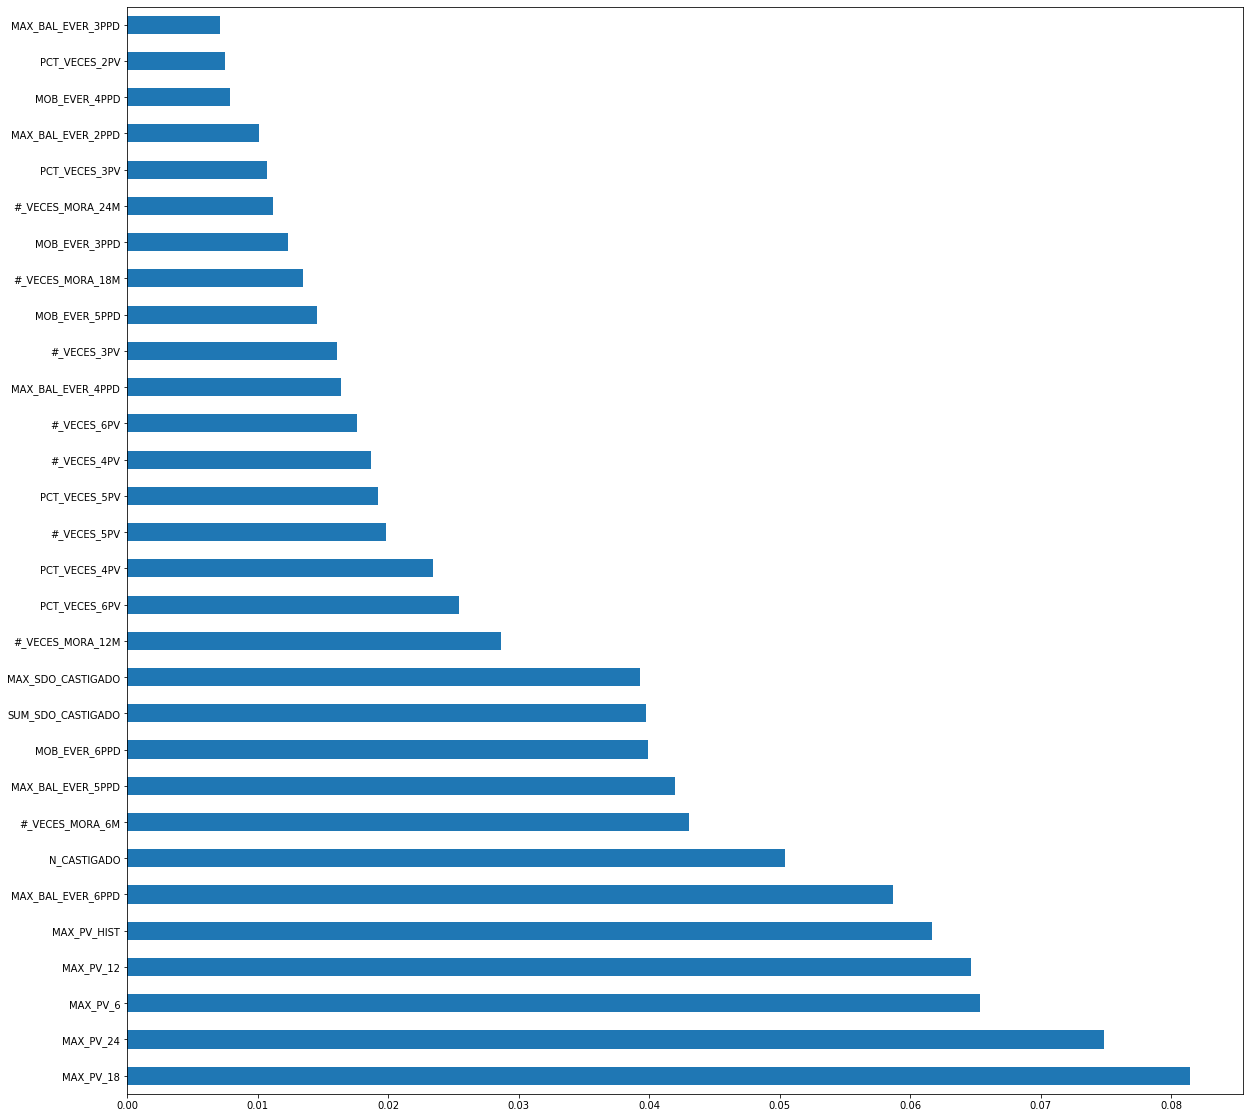

In [48]:
figure( figsize = (20,20))

feat_importances = pd.Series(rf.feature_importances_, index= X.columns)

feat_importances.nlargest(30).plot(kind='barh')

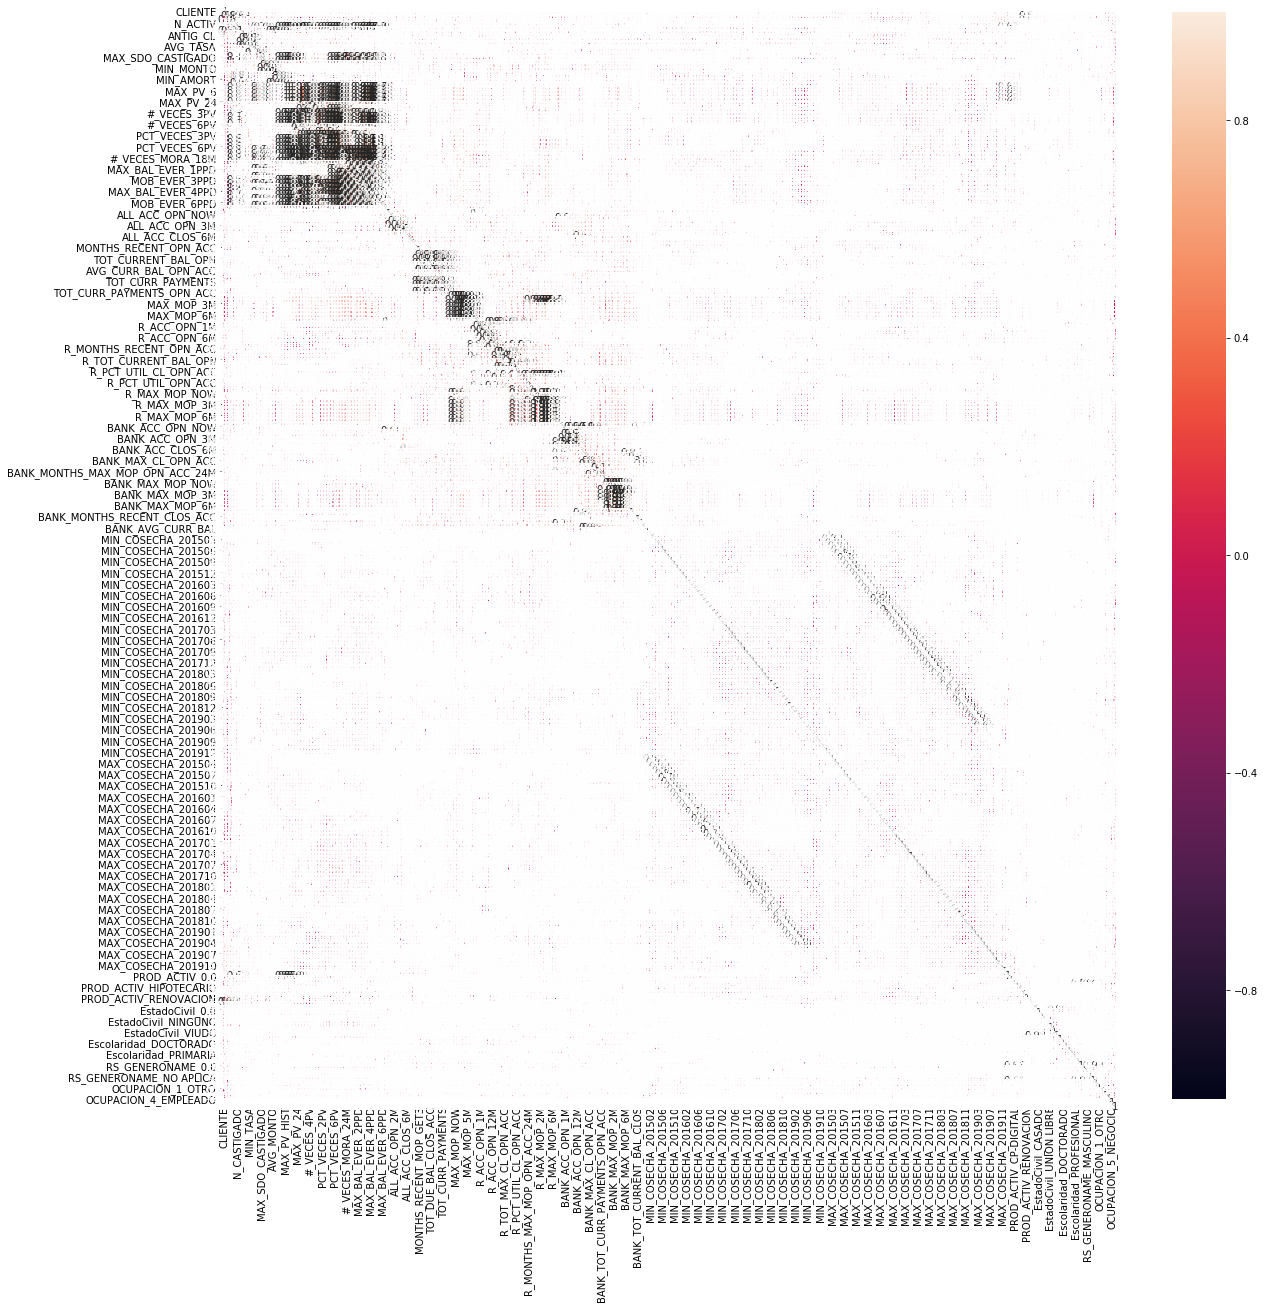

In [44]:
figure(figsize= (20,20))
cor = X.corr()
sns.heatmap(cor, annot = True)

In [46]:
tt = cor[cor > .75]

In [48]:
type(cor)

pandas.core.frame.DataFrame

In [42]:
cor.dtype()

NameError: name 'cor' is not defined

In [68]:
c = X.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")



In [72]:
list(so[so>.75])

[0.7500385461799967,
 0.7500385461799967,
 0.7500392800642101,
 0.7500392800642101,
 0.7500392800642101,
 0.7500392800642101,
 0.7500392800642101,
 0.7500392800642101,
 0.7500525990756057,
 0.7500525990756057,
 0.7513758608143504,
 0.7513758608143504,
 0.7526023487809222,
 0.7526023487809222,
 0.7533786075779192,
 0.7533786075779192,
 0.7537245944978853,
 0.7537245944978853,
 0.7540241019498702,
 0.7540241019498702,
 0.7542200093515485,
 0.7542200093515485,
 0.7543213194437784,
 0.7543213194437784,
 0.7543221571375918,
 0.7543221571375918,
 0.7553372425624111,
 0.7553372425624111,
 0.7568376667324833,
 0.7568376667324833,
 0.7582325420589899,
 0.7582325420589899,
 0.7597866823628459,
 0.7597866823628459,
 0.762892710650862,
 0.762892710650862,
 0.762892710650862,
 0.762892710650862,
 0.762892710650862,
 0.762892710650862,
 0.762981099227989,
 0.762981099227989,
 0.7630269380254829,
 0.7630269380254829,
 0.7631476338376385,
 0.7631476338376385,
 0.7661390721138339,
 0.7661390721138339,


In [ ]:
from sklearn.feature_selection import RFE

model = RandomForestClassifier(n_estimators=200)
rfe = RFE(model, 4)
start = time.process_time()
RFE_X_Train = rfe.fit_transform(X_Train,Y_Train)
RFE_X_Test = rfe.transform(X_Test)
rfe = rfe.fit(RFE_X_Train,Y_Train)
print(time.process_time() - start)
print("Overall Accuracy using RFE: ", rfe.score(RFE_X_Test,Y_Test))

### Seleccion Univariada

#### Chi cuadrado

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

min_max_scaler = preprocessing.MinMaxScaler()
Scaled_X = min_max_scaler.fit_transform(X)

X_new1 = SelectKBest(chi2, k=2).fit_transform(Scaled_X, Y)
X_Train3, X_Test3, Y_Train3, Y_Test3 = train_test_split(X_new1, Y, test_size = 0.30, 
                                                        random_state = 101)
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train3,Y_Train3)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test3)
print(confusion_matrix(Y_Test3,predictionforest))
print(classification_report(Y_Test3,predictionforest))

8.859375
[[22956     0     0]
 [    7  7916     0]
 [    0   165     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22956
           1       0.98      1.00      0.99      7923
           2       0.00      0.00      0.00       165

    accuracy                           0.99     31044
   macro avg       0.66      0.67      0.66     31044
weighted avg       0.99      0.99      0.99     31044



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [54]:
selector = SelectKBest(chi2, k=20)
selector.fit(Scaled_X, Y)

X_new = selector.transform(X)
print(X_new.shape)

X.columns[selector.get_support(indices=True)]

# 1st way to get the list
vector_names = list()
print(list(X.columns[selector.get_support(indices=True)]))

#2nd way
X.columns[selector.get_support(indices=True)].tolist()

(103478, 20)
['N_ACTIV', 'N_CASTIGADO', 'MAX_PV_HIST', 'MAX_PV_6', 'MAX_PV_12', 'MAX_PV_18', 'MAX_PV_24', '#_VECES_MORA_6M', '#_VECES_MORA_12M', '#_VECES_MORA_18M', '#_VECES_MORA_24M', 'MOB_EVER_2PPD', 'MOB_EVER_3PPD', 'MOB_EVER_4PPD', 'MOB_EVER_5PPD', 'MOB_EVER_6PPD', 'MAX_MOP_2M', 'PROD_ACTIV_0.0', 'PROD_ACTIV_OMEGA', 'PROD_ACTIV_TOP_UP']


['N_ACTIV',
 'N_CASTIGADO',
 'MAX_PV_HIST',
 'MAX_PV_6',
 'MAX_PV_12',
 'MAX_PV_18',
 'MAX_PV_24',
 '#_VECES_MORA_6M',
 '#_VECES_MORA_12M',
 '#_VECES_MORA_18M',
 '#_VECES_MORA_24M',
 'MOB_EVER_2PPD',
 'MOB_EVER_3PPD',
 'MOB_EVER_4PPD',
 'MOB_EVER_5PPD',
 'MOB_EVER_6PPD',
 'MAX_MOP_2M',
 'PROD_ACTIV_0.0',
 'PROD_ACTIV_OMEGA',
 'PROD_ACTIV_TOP_UP']

In [52]:
X.columns[selector.get_support(indices=True)]

array([  3,   4,  20,  21,  22,  23,  24,  37,  38,  39,  40,  43,  45,
        47,  49,  51,  77, 258, 263, 265], dtype=int64)

In [14]:
len(X_new)

103478

In [16]:
len(X_new1)

103478

AttributeError: 'numpy.ndarray' object has no attribute 'get_support'

In [19]:
type(X_new1)

numpy.ndarray

In [24]:
print(X_Train3.shape)

(72434, 2)


¿Para que seleccionamos variables? Por que esperamos mejorar el poder predictivo. Sin embargo,el problema es si  arrojamos un gran numero de variables a un algoritmo de ML, la importancia de las variables depende de la interaccion con otras variables. Es decir, la importancia de las variables dada otras variables. 

Rando Forest saca y pone las variables  en cada paso y al final escoge las mas importantes, pero no es perfecto por lo mencionado arriba.

La forma mas precisa seria entrenar el modelo añadiendo cada vez mas variables. 

Por eso los metedos tradicionales como las correlaciones son las mejores


### Naive Bayes

Se le llama modelo ingenuo por que asume uqe las variables independientes son independientes entre si.
El teorema de BAyes es inferir apartir de lo que sabemos, mediante la probabilidad condicional.

Aqui es importante hacer multiples modelos para ver diferentes probabilidades. Ademas que NB no funciona bien con muchos datos


In [56]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

df_small = df.sample(n=2000)
model = clf.fit(X, Y)


In [57]:
model.predict(X)


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [62]:
X.columns

Index(['CLIENTE', 'N_PROD', 'N_CONTRATOS', 'N_ACTIV', 'N_CASTIGADO', 'N_LIQ',
       'ANTIG_CL', 'MAX_TASA', 'MIN_TASA', 'AVG_TASA',
       ...
       'RS_GENERONAME_MASCULINO', 'RS_GENERONAME_NO APLICA', 'OCUPACION_0.0',
       'OCUPACION_0_NULL', 'OCUPACION_1_OTRO', 'OCUPACION_2_ESTUDIANTE',
       'OCUPACION_3_AMA_DE_CASA', 'OCUPACION_4_EMPLEADO',
       'OCUPACION_5_NEGOCIO', 'OCUPACION_6_JUBILADO'],
      dtype='object', length=294)

In [61]:
model.sigma_

array([[7.39047910e+17, 7.42149250e+08, 7.42149250e+08, ...,
        7.42149250e+08, 7.42149250e+08, 7.42149250e+08],
       [7.51529956e+17, 7.42149250e+08, 7.42149250e+08, ...,
        7.42149250e+08, 7.42149250e+08, 7.42149250e+08],
       [6.93493694e+17, 7.42149250e+08, 7.42149250e+08, ...,
        7.42149250e+08, 7.42149250e+08, 7.42149250e+08],
       [4.99050107e+11, 7.42149250e+08, 7.42149250e+08, ...,
        7.42149250e+08, 7.42149250e+08, 7.42149250e+08]])

In [28]:
df_nan.columns

Index(['CLIENTE', 'MIN_COSECHA', 'MAX_COSECHA', 'PROD_ACTIV', 'N_PROD',
       'N_CONTRATOS', 'N_ACTIV', 'N_CASTIGADO', 'N_LIQ', 'ANTIG_CL',
       ...
       'BANK_MAX_MOP_3M', 'BANK_MAX_MOP_4M', 'BANK_MAX_MOP_5M',
       'BANK_MAX_MOP_6M', 'BANK_MAX_MOP_12M', 'BANK_MONTHS_RECENT_OPN_ACC',
       'BANK_MONTHS_RECENT_CLOS_ACC', 'BANK_TOT_CURRENT_BAL_CLOS',
       'BANK_ACC_MOP3_3M', 'BANK_AVG_CURR_BAL'],
      dtype='object', length=150)

In [64]:
from sklearn.decomposition import PCA

df1 = df_nan.sample(n = 2000, random_state = 40)
variables = [ 'BANK_MAX_MOP_3M', 'BANK_MAX_MOP_4M', 'BANK_MAX_MOP_5M',
       'BANK_MAX_MOP_6M', 'BANK_MAX_MOP_12M', 'BANK_MONTHS_RECENT_OPN_ACC',
       'BANK_MONTHS_RECENT_CLOS_ACC', 'BANK_TOT_CURRENT_BAL_CLOS',
       'BANK_ACC_MOP3_3M', 'BANK_AVG_CURR_BAL']
df_data = df1[variables]
df_label = df1['F_6_C']
pca = PCA(n_components = 3, whiten = True)
data = pca.fit_transform(df_data)
print(pca.explained_variance_ratio_)

[8.85069358e-01 1.14929029e-01 7.23577799e-07]


In [65]:
pca.components_

array([[ 9.68541427e-05,  9.68789177e-05,  9.68726085e-05,
         9.69654410e-05,  9.68917862e-05,  1.27361837e-04,
         8.62030757e-05,  9.20857179e-03,  8.70435191e-06,
         9.99957565e-01],
       [ 1.55169258e-04,  1.55351403e-04,  1.55328438e-04,
         1.55284394e-04,  1.55096492e-04,  4.05365671e-06,
         1.18346173e-04,  9.99957532e-01,  7.80267365e-06,
        -9.20865749e-03],
       [ 3.83256545e-01,  3.83305629e-01,  3.83350260e-01,
         3.83333337e-01,  3.83806078e-01,  4.31741379e-01,
         2.80182144e-01, -3.35018604e-04,  8.91107073e-03,
        -2.61891674e-04]])

In [36]:
# PCA
pca = PCA(n_components=2)
pca.fit_transform(df_data)

# Dump components relations with features:
pd.DataFrame(pca.components_,columns=df_data.columns,index = ['PC-1','PC-2'])

,BANK_MAX_MOP_3M,BANK_MAX_MOP_4M,BANK_MAX_MOP_5M,BANK_MAX_MOP_6M,BANK_MAX_MOP_12M,BANK_MONTHS_RECENT_OPN_ACC,BANK_MONTHS_RECENT_CLOS_ACC,BANK_TOT_CURRENT_BAL_CLOS,BANK_ACC_MOP3_3M,BANK_AVG_CURR_BAL
PC-1,0.000097,0.000097,0.000097,0.000097,0.000097,0.000127,0.000086,0.009209,0.000009,0.999958
PC-2,0.000155,0.000155,0.000155,0.000155,0.000155,0.000004,0.000118,0.999958,0.000008,-0.009209


In [39]:
model = PCA(n_components=2).fit(df_data)


# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = df_data.columns

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(sorted(dic.items()))

In [40]:
df

,0,1
0,PC1,BANK_AVG_CURR_BAL
1,PC2,BANK_TOT_CURRENT_BAL_CLOS


### Outliers

Ver outlieres con boxplot

In [ ]:
boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3'])